In [1]:
import matplotlib.pyplot as plt

In [2]:
def test_rotation_mode(fig, mode):
    ha_list = ["left", "center", "right"]
    va_list = ["top", "center", "baseline", "bottom"]
    axs = fig.subplots(
        len(va_list), len(ha_list), sharex=True, sharey=True,
        subplot_kw={"aspect": 1}, gridspec_kw={"hspace": 0, "wspace": 0},
    )
    
    # labels and title
    for ha, ax in zip(ha_list, axs[-1, :]):
        ax.set_xlabel(ha)
    for va, ax in zip(va_list, axs[:, 0]):
        ax.set_ylabel(va)
    axs[0, 1].set_title(f"rotation_mode='{mode}'", size="large")
    
    kw = (
        {} if mode == "default" else
        {"bbox": {"boxstyle": "square,pad=0", "ec": "none", "fc": "C1", "alpha": 0.3}}
    )
    
    texts = {}
    # use a different text alignment in each axes
    for i, va in enumerate(va_list):
        for j, ha in enumerate(ha_list):
            ax = axs[i, j]
            # prepare axes layout
            ax.set(xticks=[], yticks=[])
            ax.axvline(0.5, color="skyblue", zorder=0)
            ax.axhline(0.5, color="skyblue", zorder=0)
            ax.plot(0.5, 0.5, color="C0", marker="o", zorder=1)
            # add text with rotation and alignment settings
            tx = ax.text(
                0.5, 0.5, "Tpg", size="x-large", rotation=40, rotation_mode=mode,
                horizontalalignment=ha, verticalalignment=va, **kw,
            )
            texts[ax] = tx
    
    if mode == "default":
        # highlight bbox
        fig.canvas.draw()
        for ax, text in texts.items():
            bb = text.get_window_extent().transformed(ax.transData.inverted())
            rect = plt.Rectangle(
                (bb.x0, bb.y0), bb.width, bb.height,
                facecolor="C1", alpha=0.3, zorder=2
            )
            ax.add_patch(rect)

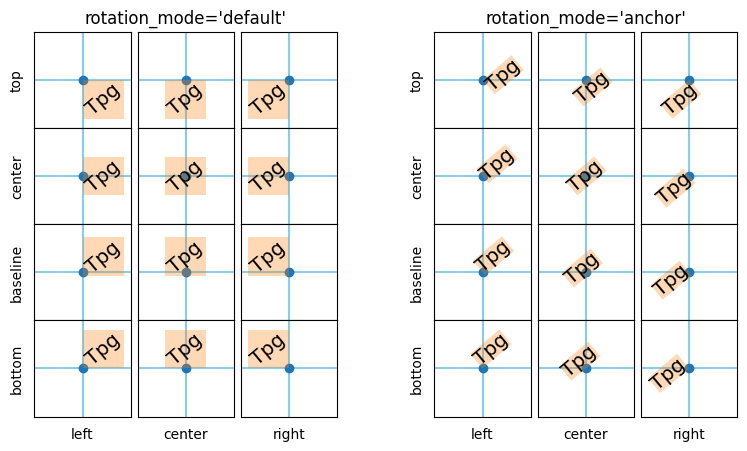

In [3]:
fig = plt.figure(figsize=(8, 5))
subfigs = fig.subfigures(1, 2)
test_rotation_mode(subfigs[0], "default")
test_rotation_mode(subfigs[1], "anchor")
plt.show()